In [1]:
import pandas as pd
import numpy as np
import os
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
from collections import defaultdict
import itertools
import operator
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

# Replace YAML configuration with direct parameters
network_data_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonly.csv'  # Update this path as needed
n_layers = 1  # As your data does not have multiple layers

def import_network(path):
    """
    Import network data from CSV.
    """
    df = pd.read_csv(path)
    return df

def create_edge_list(df):
    """
    Create edge list from dataframe.
    """
    edges = list(zip(df["dms_orig_string"], df["dms_dest_string"]))
    return edges

def calculate_gc_size(graph):
    """
    Calculate the size of the giant component.
    """
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    return gc_size

def calculate_diameter(graph):
    """
    Calculate the diameter of the graph.
    """
    return nx.diameter(graph)

def normalize_gc_list(gc_list):
    """
    Normalize the giant component list.
    """
    return np.array(gc_list) / max(gc_list)

if __name__ == "__main__":
    # Import network data
    df = import_network(network_data_path)
    edges = create_edge_list(df)
    
    # Create the graph
    G = nx.Graph()
    G.add_edges_from(edges)
    
    # Calculate metrics
    gc_size = calculate_gc_size(G)
    diameter = calculate_diameter(G)
    
    print(f"Giant Component Size: {gc_size}")
    print(f"Diameter: {diameter}")


Giant Component Size: 84
Diameter: 4


Number of unique nodes: 84
Giant Component Size: 84
Diameter: 4


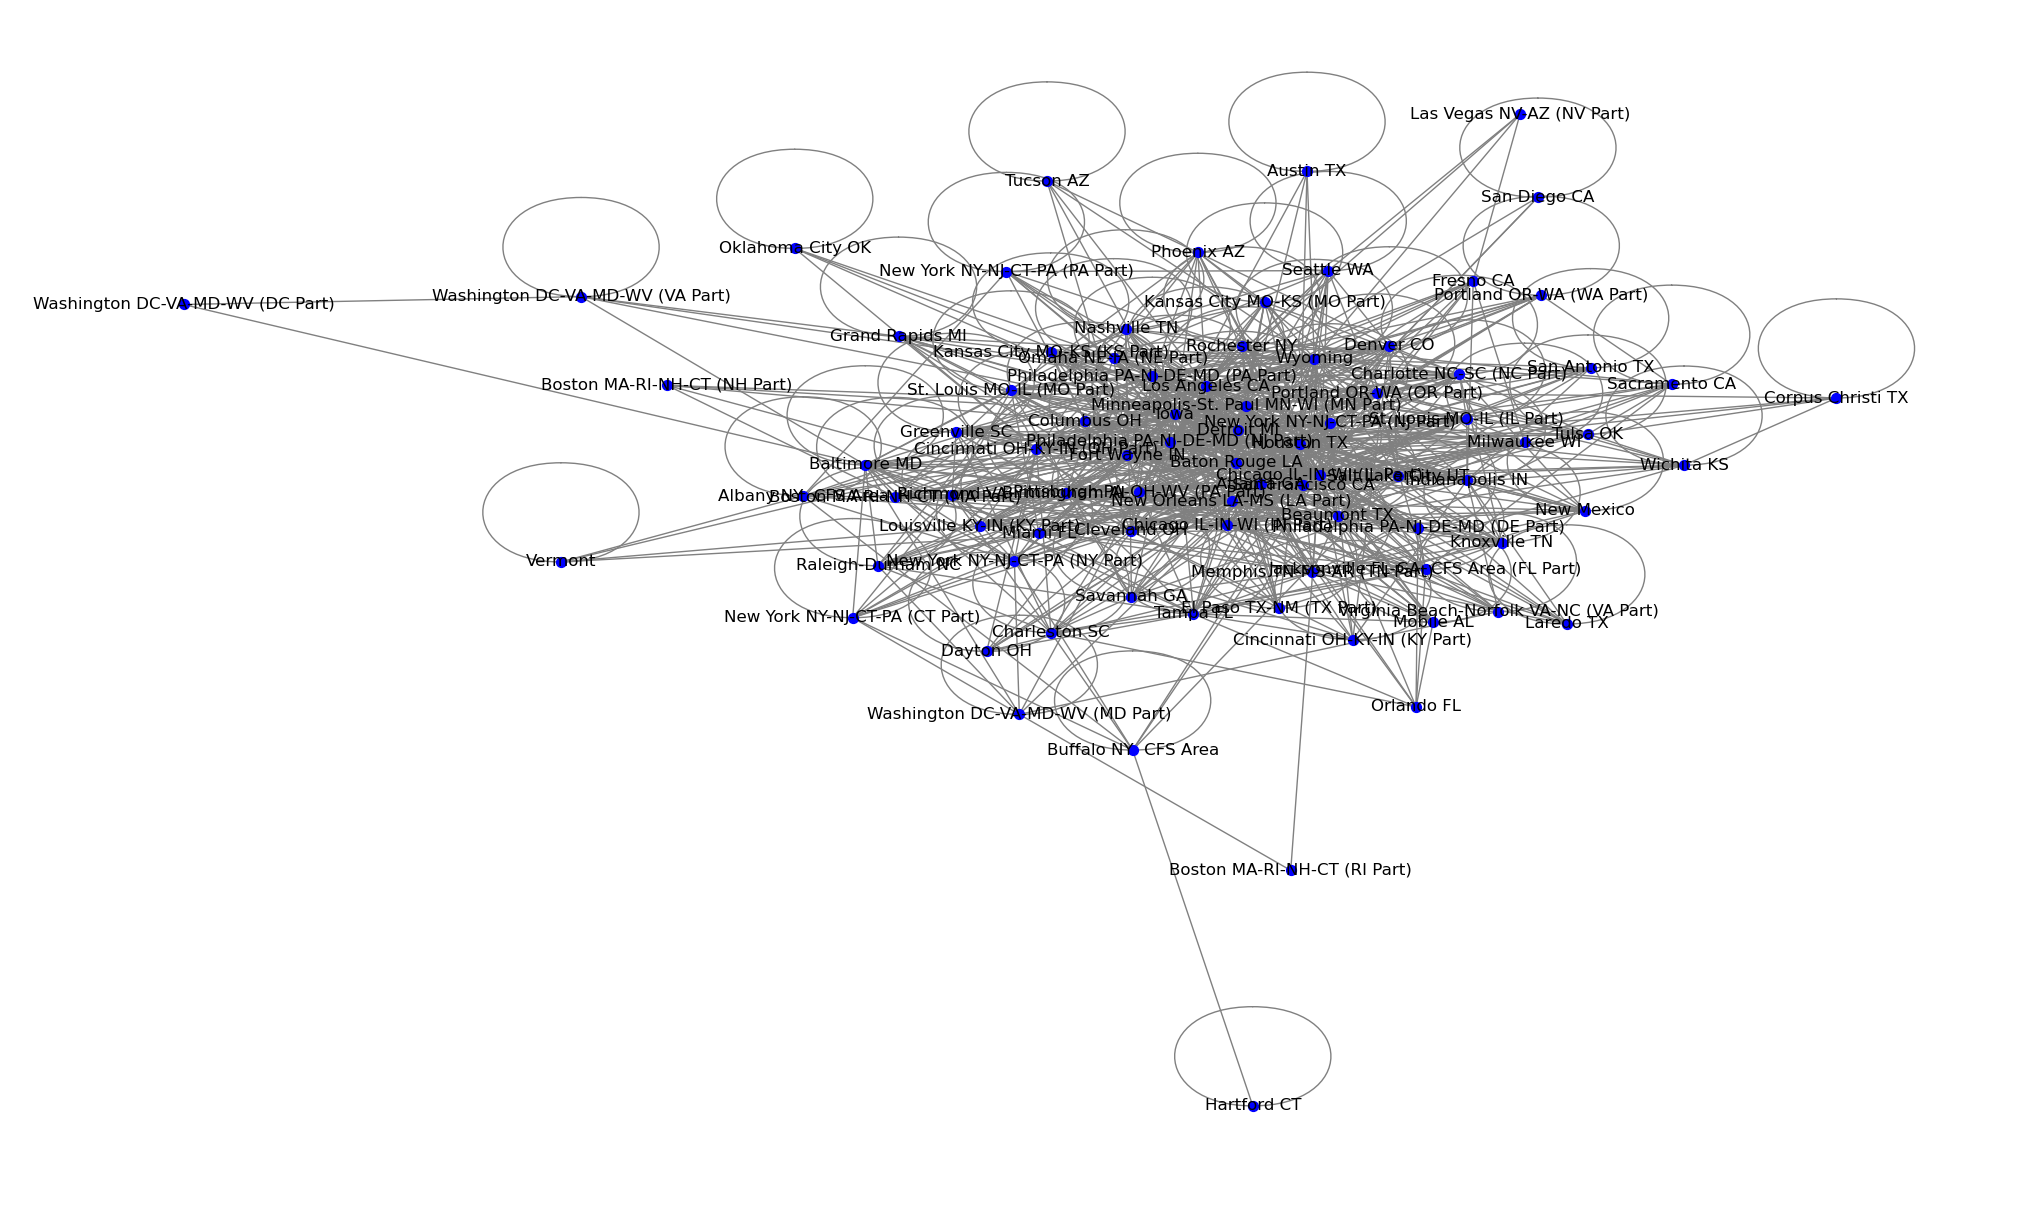

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
from collections import defaultdict
import itertools
import operator
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

# Replace YAML configuration with direct parameters
network_data_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonly.csv'  # Update this path as needed

def import_network(path):
    """
    Import network data from CSV.
    """
    df = pd.read_csv(path)
    return df

def create_edge_list(df):
    """
    Create edge list from dataframe.
    """
    edges = list(zip(df["dms_orig_string"], df["dms_dest_string"]))
    return edges

def calculate_gc_size(graph):
    """
    Calculate the size of the giant component.
    """
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    return gc_size

def calculate_diameter(graph):
    """
    Calculate the diameter of the graph.
    """
    return nx.diameter(graph)

def normalize_gc_list(gc_list):
    """
    Normalize the giant component list.
    """
    return np.array(gc_list) / max(gc_list)

def node_list(df):
    """
    Create a list of unique nodes from the dataframe.
    """
    temp = list(set(df["dms_orig_string"]))
    temp2 = list(set(df["dms_dest_string"]))
    node_list = list(set(temp + temp2))
    return node_list

if __name__ == "__main__":
    # Import network data
    df = import_network(network_data_path)
    edges = create_edge_list(df)
    nodes = node_list(df)
    
    # Print the number of unique nodes
    print(f"Number of unique nodes: {len(nodes)}")
    
    # Create the graph
    G = nx.Graph()
    G.add_edges_from(edges)
    
    # Calculate metrics
    gc_size = calculate_gc_size(G)
    diameter = calculate_diameter(G)
    
    print(f"Giant Component Size: {gc_size}")
    print(f"Diameter: {diameter}")
    
    # Optional: Draw the graph
    plt.figure(figsize=(20,12))
    nx.draw(G, with_labels=True, node_size=50, node_color='blue', edge_color='gray')
    plt.show()


In [3]:
import pandas as pd
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
from collections import defaultdict
import itertools
import operator
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

# Replace YAML configuration with direct parameters
network_data_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonly.csv'  # Update this path as needed

def import_network(path):
    """
    Import network data from CSV.
    """
    df = pd.read_csv(path)
    return df

def create_edge_list(df):
    """
    Create edge list from dataframe.
    """
    edges = list(zip(df["dms_orig_string"], df["dms_dest_string"]))
    return edges

def calculate_gc_size(graph):
    """
    Calculate the size of the giant component.
    """
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    return gc_size

def calculate_diameter(graph):
    """
    Calculate the diameter of the graph.
    """
    return nx.diameter(graph)

def n_connected_components(graph):
    """
    Calculate the number of connected components.
    """
    return nx.number_connected_components(graph)

def normalize_gc_list(gc_list):
    """
    Normalize the giant component list.
    """
    return np.array(gc_list) / max(gc_list)

def network_functionality(original_graph, graph):
    """
    Calculate network functionality.
    """
    sd = dict(nx.shortest_path_length(graph))
    node_pairs = list(itertools.combinations(graph, 2))
    node_weights = nx.betweenness_centrality(original_graph)

    nf = 0
    for pair in node_pairs:
        source, target = pair
        source_w, target_w = node_weights[source], node_weights[target]
        
        try:
            nf += source_w * target_w * (1/sd[source][target])
        except:
            continue
        
    return nf

if __name__ == "__main__":
    # Import network data
    df = import_network(network_data_path)
    edges = create_edge_list(df)
    
    # Aggregate edges (remove duplicates)
    agg_edges = list(set(edges))
    
    # Create the aggregated graph
    agg_G = nx.Graph()
    agg_G.add_edges_from(agg_edges)
    
    # Choose the graph to analyze
    G = agg_G
    edge_list = agg_edges

    # Get the list of unique nodes
    node_list = list(G.nodes)
    print(f"Number of unique nodes: {len(node_list)}")

    # Calculate initial metrics
    initial_gc_size = calculate_gc_size(G)
    initial_diameter = calculate_diameter(G)
    initial_n_components = n_connected_components(G)
    initial_network_functionality = network_functionality(G, G)
    
    print(f"Initial Giant Component Size: {initial_gc_size}")
    print(f"Initial Diameter: {initial_diameter}")
    print(f"Initial Number of Connected Components: {initial_n_components}")
    print(f"Initial Network Functionality: {initial_network_functionality}")


Number of unique nodes: 84
Initial Giant Component Size: 84
Initial Diameter: 4
Initial Number of Connected Components: 1
Initial Network Functionality: 0.3128523530745604


['Washington DC-VA-MD-WV (DC Part)', 'Austin TX', 'San Diego CA', 'Las Vegas NV-AZ (NV Part)', 'San Antonio TX', 'Corpus Christi TX', 'Mobile AL', 'El Paso TX-NM (TX Part)', 'Laredo TX', 'Portland OR-WA (WA Part)', 'Fresno CA', 'St. Louis MO-IL (IL Part)', 'Milwaukee WI', 'Virginia Beach-Norfolk VA-NC (VA Part)', 'Tucson AZ', 'Denver CO', 'Kansas City MO-KS (KS Part)', 'Grand Rapids MI', 'Dayton OH', 'Wichita KS', 'Oklahoma City OK', 'Rochester NY', 'New York NY-NJ-CT-PA (PA Part)', 'Seattle WA', 'Greenville SC', 'Charlotte NC-SC (NC Part)', 'Louisville KY-IN (KY Part)', 'Omaha NE-IA (NE Part)', 'Orlando FL', 'Kansas City MO-KS (MO Part)', 'New Mexico', 'Philadelphia PA-NJ-DE-MD (DE Part)', 'St. Louis MO-IL (MO Part)', 'Knoxville TN', 'Phoenix AZ', 'Savannah GA', 'Nashville TN', 'New York NY-NJ-CT-PA (NJ Part)', 'Cincinnati OH-KY-IN (KY Part)', 'Richmond VA', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Birmingham AL', 'Boston MA-RI-NH-CT (NH Part)', 'Tulsa OK', 'Washington DC-V

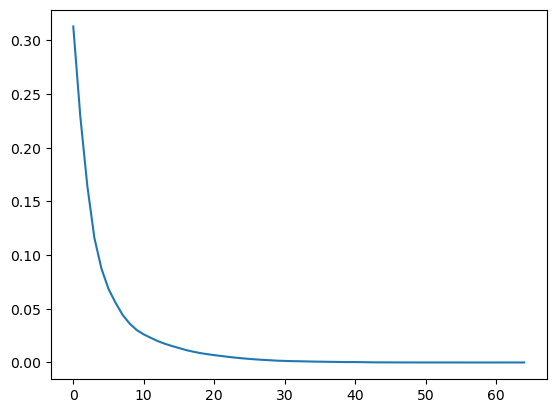

In [4]:
# Assuming the previous parts of the code have been executed and G, edge_list, and node_list are defined

# Calculate all centrality measures and create sorted node lists for removal/addition

# DEGREE
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_nodes_by_degree = [i[0] for i in sorted_nodes_by_degree]

# BETWEENNESS
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]

# EIGENVALUE
eigen_c = nx.eigenvector_centrality_numpy(G)
temp = sorted(eigen_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_eigenc = [i[0] for i in temp]

# CLOSENESS
closeness_c = nx.closeness_centrality(G)
temp = sorted(closeness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_closeness = [i[0] for i in temp]

# CLUSTERING
clustering_c = nx.clustering(G)
temp = sorted(clustering_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_clustering = [i[0] for i in temp]

print(sorted_nodes_by_clustering)
print('\n', len(sorted_nodes_by_clustering))

n_iter = 2

# RANDOM
node_list_copy = copy.deepcopy(node_list)
sorted_nodes_by_random = []

for i in range(n_iter):
    sorted_nodes_by_random.append(random.sample(node_list_copy, 65))

print(len(sorted_nodes_by_random[0]))

def remove_nodes(G, nodes_to_remove, edge_list):
    """
    nodes_to_remove: list
    edge_list: for this layer the original list of tuples (edges) e.g. [(1,77), (4,13)..]
    returns list of GC sizes as the network fails and the graph remaining 
    """
    updated_edges = copy.deepcopy(edge_list)
    updated_G = copy.deepcopy(G)
    initial_gc_size = network_functionality(G, G)
    gc_list = []
    gc_list.append(initial_gc_size)

    count = 0
    for node in nodes_to_remove:
        updated_G.remove_edges_from(list(G.edges(node)))
        gc_list.append(network_functionality(G, updated_G))
        updated_G.remove_node(node)
        count += 1

    if len(nodes_to_remove) == len(G.nodes()):
        gc_list.append(0)

    return gc_list, updated_G, count

# FAILURE

nodes_to_remove = sorted_nodes_by_degree
gc_list_by_degree, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_eigenc
gc_list_by_eigenc, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_closeness
gc_list_by_closeness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_clustering
gc_list_by_clustering, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

# BETWEENNESS
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]

nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

# RANDOM
gc_list_by_random = []
updated_G_list = []

for i in range(n_iter):
    print(i)
    nodes_to_remove = sorted_nodes_by_random[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_random.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)

# Plot results
plt.plot(gc_list_by_betweenness[:65])
plt.show()


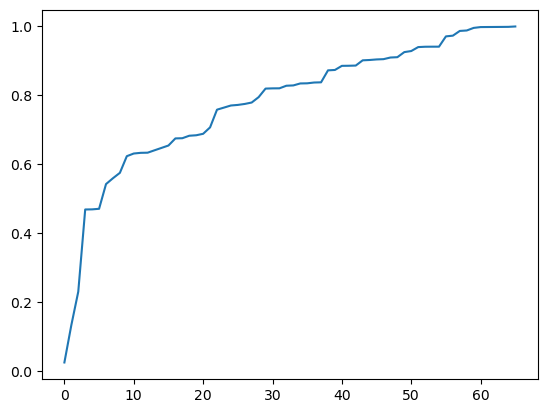

In [5]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    """
    Recovery function to add nodes back to the graph.
    """
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
    
    re_gc_list = []
    count = 0
    initial_gc_size = network_functionality(G, G)
    
    for node in nodes_to_add:
        re_gc_list.append(network_functionality(G, re_updated_G))
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
    
    re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count

# RECOVERY

nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_clustering
re_gc_list_by_clustering, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

# RECOVERY - RANDOM

re_gc_list_by_random = []
re_updated_G_list = []

for i in range(n_iter):
    nodes_to_add = sorted_nodes_by_random[i]
    re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    re_gc_list_by_random.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(re_updated_G_temp)

plt.plot(np.mean(np.array(re_gc_list_by_random), axis=0))
plt.show()


In [6]:
"""RECOVERY - Betweenness"""

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)

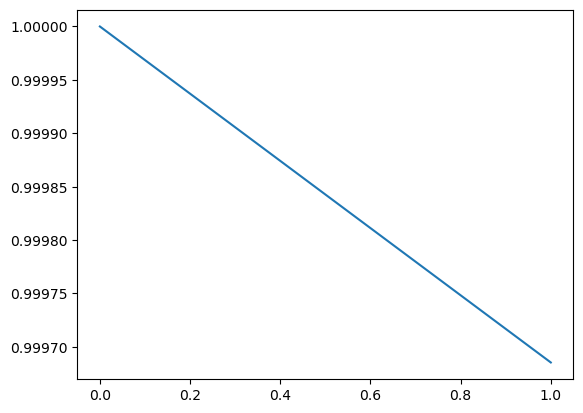

In [7]:
# FAILURE - FLOODS

# Define the node to be removed in case of flood failure
flood_failure_node = "San Antonio TX"

# Remove the node "San Antonio TX" and analyze the impact
def remove_flood_failure_node(G, flood_node, edge_list):
    nodes_to_remove = [flood_node]
    gc_list, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)
    return gc_list, updated_G, count

# Create the initial aggregated graph
agg_edges = list(set(edge_list))
agg_G = nx.Graph()
agg_G.add_edges_from(agg_edges)

# Choose the graph to analyze
G = agg_G
edge_list = agg_edges

# Remove the flood failure node and analyze
gc_list_by_floods, updated_G, count = remove_flood_failure_node(G, flood_failure_node, edge_list)

# Random Flood Scenarios
# Since the user requested to keep the flood failure scenario to be removing "San Antonio TX", we simplify it here
sorted_nodes_by_floods = [[flood_failure_node] for _ in range(30)]

gc_list_by_floods = []
updated_G_list = []

for i in range(30):
    nodes_to_remove = sorted_nodes_by_floods[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_floods.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)

# Plot results for flood failure scenarios
plt.plot(np.mean(np.array(gc_list_by_floods), axis=0))
plt.show()


In [8]:
gc_list_by_floods[0]

array([1.        , 0.99968542])

In [9]:
def add_one_node(G, graph, node_to_add):
    graph_copy = copy.deepcopy(graph)
    
    nf_1 = network_functionality(G, graph_copy)
    
    graph_copy.add_node(node_to_add)
    graph_copy.add_edges_from(list(G.edges(node_to_add)))
    
    nf_2 = network_functionality(G, graph_copy)
    
    delta_nf = nf_2 - nf_1
    
    return delta_nf

# Assuming updated_G_list[0] is the graph after "San Antonio TX" was removed
updated_G = updated_G_list[0]
initial_nf = network_functionality(G, updated_G)
nodes_to_add = [flood_failure_node]  # Since we are dealing with the specific case of "San Antonio TX"
len(nodes_to_add)

greedy_nodes_to_add = []

while len(nodes_to_add) > 0:
    print(len(nodes_to_add))
    
    delta_nf = defaultdict(int)
    
    for node in nodes_to_add:
        if node not in greedy_nodes_to_add:
            delta_nf[node] = add_one_node(G, updated_G, node)
            
    temp_max_nf = max(delta_nf.items(), key=operator.itemgetter(1))[0]
    print(temp_max_nf)
    greedy_nodes_to_add.append(temp_max_nf)
    print(greedy_nodes_to_add)
    
    nodes_to_add.remove(temp_max_nf)


1
San Antonio TX
['San Antonio TX']


In [10]:
#max(delta_nf.items(), key=operator.itemgetter(1))[0]
len(greedy_nodes_to_add)

1

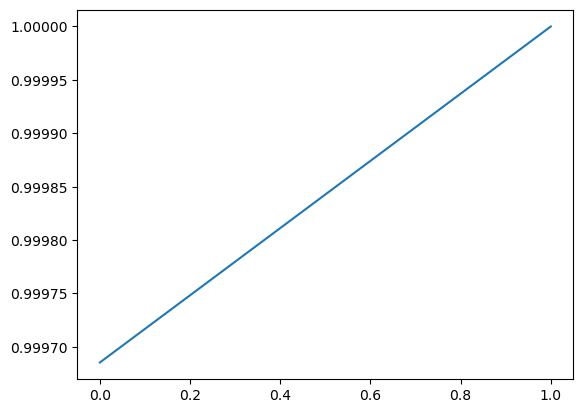

In [11]:
"""GREEDY RECOVERY"""

re_gc_list_by_floods_greedy = []
re_updated_G_list = []

nodes_to_add = greedy_nodes_to_add
re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G, nodes_to_add, edge_list)
re_gc_list_by_floods_greedy.append(normalize_gc_list(re_gc_temp))
re_updated_G_list.append(updated_G_temp)
plt.plot(re_gc_list_by_floods_greedy[0])

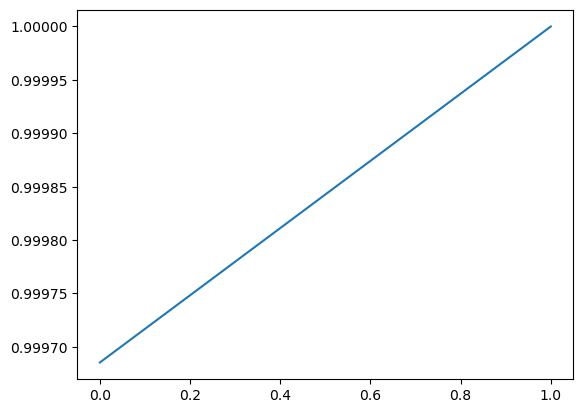

In [12]:
"""GREEDY RECOVERY"""

# Initialize lists for storing results
re_gc_list_by_floods_greedy = []
re_updated_G_list = []

# Use the greedy_nodes_to_add generated previously
nodes_to_add = greedy_nodes_to_add

# Perform the recovery by adding nodes back to the graph
re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G, nodes_to_add, edge_list)
re_gc_list_by_floods_greedy.append(normalize_gc_list(re_gc_temp))
re_updated_G_list.append(updated_G_temp)

# Plot the recovery results
plt.plot(re_gc_list_by_floods_greedy[0])
plt.show()


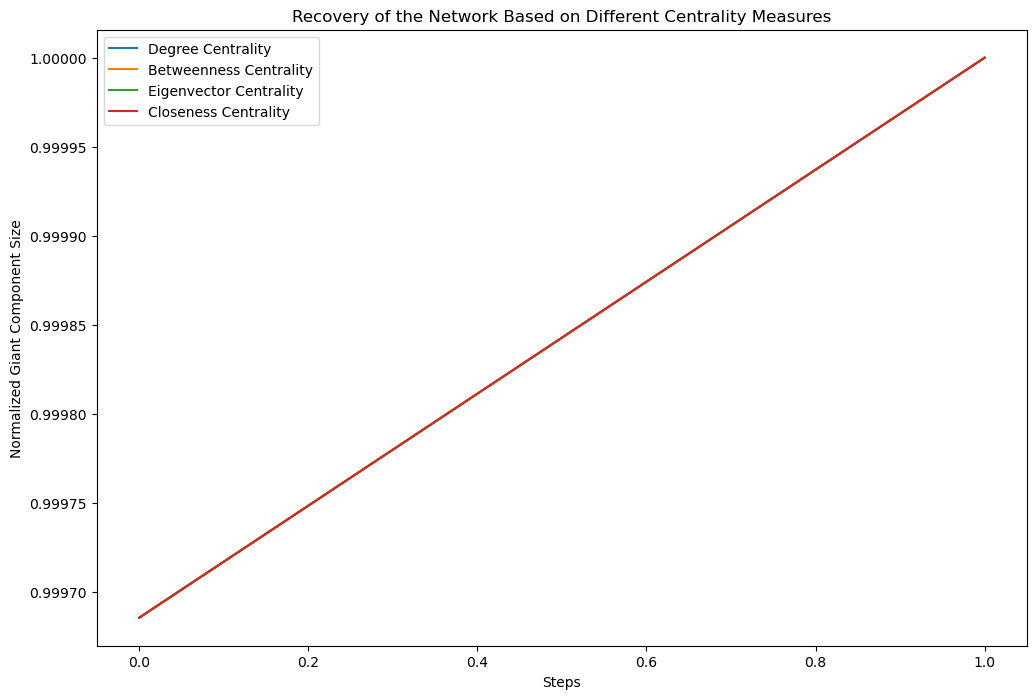

In [14]:
# RECOVERY - FLOODS (SAME ORDER AS FAILED)

# Nodes to Add

re_gc_list_by_floods = []
re_updated_G_list = []

# Since we are dealing with the specific case of "San Antonio TX"
for i in range(1):  # We only need one iteration as we are adding back the same node
    nodes_to_add = [flood_failure_node]
    re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G, nodes_to_add, edge_list)
    re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(updated_G_temp)

# RECOVERY - FLOODS (BASED ON CENTRALITY MEASURES)

# DEGREE
mydict = dict(G.degree([flood_failure_node]))
sorted_nodes_by_degree = sorted(mydict, reverse=True, key=lambda k: mydict[k])

nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_degree = normalize_gc_list(re_gc_list_by_degree)

# BETWEENNESS
my_dict = nx.betweenness_centrality(G)
temp = {k: my_dict[k] for k in [flood_failure_node] if k in my_dict}
sorted_nodes_by_betweenness = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_betweenness = normalize_gc_list(re_gc_list_by_betweenness)

# EIGENVECTOR
my_dict = nx.eigenvector_centrality(G)
temp = {k: my_dict[k] for k in [flood_failure_node] if k in my_dict}
sorted_nodes_by_eigenc = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_eigenc = normalize_gc_list(re_gc_list_by_eigenc)

# CLOSENESS
my_dict = nx.closeness_centrality(G)
temp = {k: my_dict[k] for k in [flood_failure_node] if k in my_dict}
sorted_nodes_by_closeness = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_closeness = normalize_gc_list(re_gc_list_by_closeness)

# Plot the recovery results for each centrality measure
plt.figure(figsize=(12, 8))
plt.plot(re_gc_list_by_degree, label='Degree Centrality')
plt.plot(re_gc_list_by_betweenness, label='Betweenness Centrality')
plt.plot(re_gc_list_by_eigenc, label='Eigenvector Centrality')
plt.plot(re_gc_list_by_closeness, label='Closeness Centrality')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Normalized Giant Component Size')
plt.title('Recovery of the Network Based on Different Centrality Measures')
plt.show()


Length of re_gc_list_by_floods_random[0]: 2
Length of re_gc_list_by_floods_random_mean: 2
Length of node_frac: 66
Length of gc_list_by_random_mean: 66
Length of re_gc_list_by_random_mean: 2
Length of gc_list_by_floods_mean: 2
Length of re_gc_list_by_floods_mean: 2


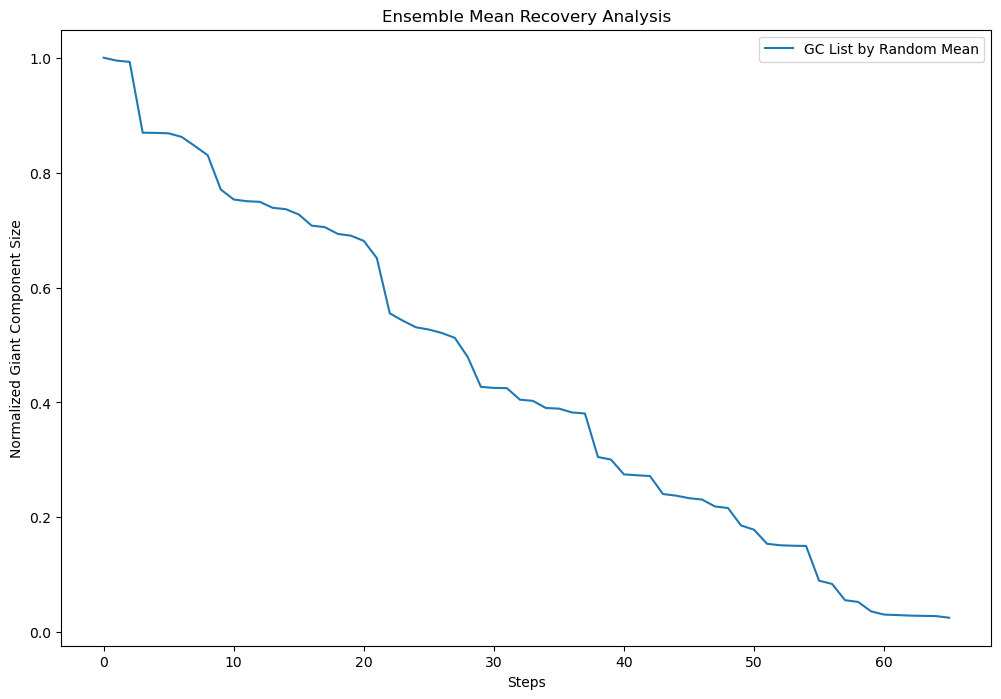

In [15]:
"""RANDOM FLOOD RECOVERY"""

re_gc_list_by_floods_random = []

# Perform random flood recovery for 30 iterations
for i in range(30):
    nodes_to_add = [flood_failure_node]  # We only need to add back the specific node "San Antonio TX"
    temp, re_updated_G, count = add_nodes(G, updated_G_list[i % len(updated_G_list)], nodes_to_add, edge_list)
    temp = normalize_gc_list(temp)
    re_gc_list_by_floods_random.append(temp)

# Calculate the mean of the random flood recovery results
re_gc_list_by_floods_random_mean = np.mean(np.array(re_gc_list_by_floods_random), axis=0)

print(f"Length of re_gc_list_by_floods_random[0]: {len(re_gc_list_by_floods_random[0])}")
print(f"Length of re_gc_list_by_floods_random_mean: {len(re_gc_list_by_floods_random_mean)}")

# EXTRACT GC SIZE LISTS
np.save('agg_gc_list_by_random', gc_list_by_random)
np.save('agg_re_gc_list_by_random', re_gc_list_by_floods_random)

np.save('agg_gc_list_by_degree', gc_list_by_degree)
np.save('agg_re_gc_list_by_degree', re_gc_list_by_degree)

np.save('agg_gc_list_by_betweenness', gc_list_by_betweenness)
np.save('agg_re_gc_list_by_betweenness', re_gc_list_by_betweenness)

np.save('agg_gc_list_by_eigenc', gc_list_by_eigenc)
np.save('agg_re_gc_list_by_eigenc', re_gc_list_by_eigenc)

np.save('agg_gc_list_by_closeness', gc_list_by_closeness)
np.save('agg_re_gc_list_by_closeness', re_gc_list_by_closeness)

np.save('agg_gc_list_by_clustering', gc_list_by_clustering)
np.save('agg_re_gc_list_by_clustering', re_gc_list_by_clustering)

# Ensemble Mean - Random
gc_array_by_random = np.array(gc_list_by_random)
re_gc_array_by_random = np.array(re_gc_list_by_floods_random)

gc_list_by_random_mean = np.mean(gc_array_by_random, axis=0)
re_gc_list_by_random_mean = np.mean(re_gc_array_by_random, axis=0)

# Calculate ensemble mean for flood recovery
gc_list_by_floods_mean = np.mean(np.array(gc_list_by_floods), axis=0)
re_gc_list_by_floods_mean = np.mean(np.array(re_gc_list_by_floods), axis=0)

# Ensure node_frac length matches the mean arrays
max_len = max(len(gc_list_by_random_mean), len(re_gc_list_by_random_mean), len(gc_list_by_floods_mean), len(re_gc_list_by_floods_mean))
node_frac = np.arange(max_len)

print(f"Length of node_frac: {len(node_frac)}")
print(f"Length of gc_list_by_random_mean: {len(gc_list_by_random_mean)}")
print(f"Length of re_gc_list_by_random_mean: {len(re_gc_list_by_random_mean)}")
print(f"Length of gc_list_by_floods_mean: {len(gc_list_by_floods_mean)}")
print(f"Length of re_gc_list_by_floods_mean: {len(re_gc_list_by_floods_mean)}")

# Plot the ensemble mean results
plt.figure(figsize=(12, 8))
if len(gc_list_by_random_mean) == max_len:
    plt.plot(node_frac, gc_list_by_random_mean, label='GC List by Random Mean')
if len(re_gc_list_by_random_mean) == max_len:
    plt.plot(node_frac, re_gc_list_by_random_mean, label='RE GC List by Random Mean')
if len(gc_list_by_floods_mean) == max_len:
    plt.plot(node_frac, gc_list_by_floods_mean, label='GC List by Floods Mean')
if len(re_gc_list_by_floods_mean) == max_len:
    plt.plot(node_frac, re_gc_list_by_floods_mean, label='RE GC List by Floods Mean')

plt.xlabel('Steps')
plt.ylabel('Normalized Giant Component Size')
plt.legend()
plt.title('Ensemble Mean Recovery Analysis')
plt.show()


Length of node_frac: 66
Length of gc_list_by_random_mean: 66
Length of re_gc_list_by_random_mean: 66
Length of gc_list_by_degree_mean: 1
Length of re_gc_list_by_degree_mean: 1
Length of gc_list_by_betweenness_mean: 1
Length of re_gc_list_by_betweenness_mean: 1
Length of gc_list_by_eigenc_mean: 1
Length of re_gc_list_by_eigenc_mean: 1
Length of gc_list_by_closeness_mean: 1
Length of re_gc_list_by_closeness_mean: 1
Length of gc_list_by_clustering_mean: 1
Length of re_gc_list_by_clustering_mean: 1


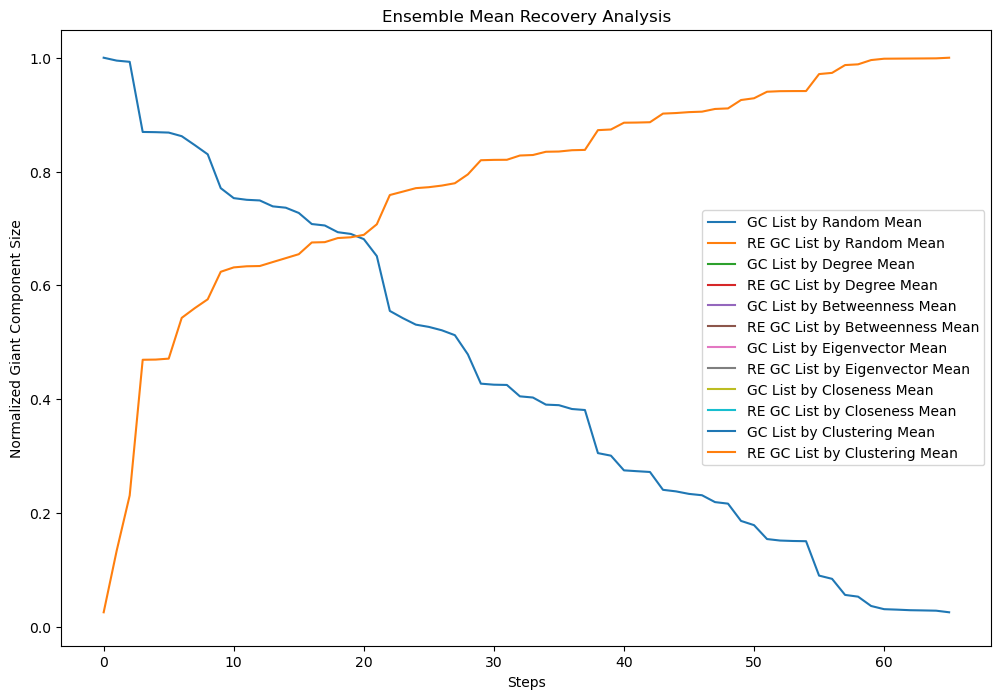

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous parts of the code have been executed and we have:
# - gc_list_by_random
# - re_gc_list_by_random
# - gc_list_by_degree
# - re_gc_list_by_degree
# - gc_list_by_betweenness
# - re_gc_list_by_betweenness
# - gc_list_by_eigenc
# - re_gc_list_by_eigenc
# - gc_list_by_closeness
# - re_gc_list_by_closeness
# - gc_list_by_clustering
# - re_gc_list_by_clustering

def ensure_array(val):
    return val if isinstance(val, np.ndarray) else np.array([val])

# Calculating means of the results for plotting
gc_list_by_random_mean = ensure_array(np.mean(gc_list_by_random, axis=0))
re_gc_list_by_random_mean = ensure_array(np.mean(re_gc_list_by_random, axis=0))

gc_list_by_degree_mean = ensure_array(np.mean(gc_list_by_degree, axis=0))
re_gc_list_by_degree_mean = ensure_array(np.mean(re_gc_list_by_degree, axis=0))

gc_list_by_betweenness_mean = ensure_array(np.mean(gc_list_by_betweenness, axis=0))
re_gc_list_by_betweenness_mean = ensure_array(np.mean(re_gc_list_by_betweenness, axis=0))

gc_list_by_eigenc_mean = ensure_array(np.mean(gc_list_by_eigenc, axis=0))
re_gc_list_by_eigenc_mean = ensure_array(np.mean(re_gc_list_by_eigenc, axis=0))

gc_list_by_closeness_mean = ensure_array(np.mean(gc_list_by_closeness, axis=0))
re_gc_list_by_closeness_mean = ensure_array(np.mean(re_gc_list_by_closeness, axis=0))

gc_list_by_clustering_mean = ensure_array(np.mean(gc_list_by_clustering, axis=0))
re_gc_list_by_clustering_mean = ensure_array(np.mean(re_gc_list_by_clustering, axis=0))

# Ensure node_frac length matches the mean arrays
max_len = max(len(gc_list_by_random_mean), len(re_gc_list_by_random_mean),
              len(gc_list_by_degree_mean), len(re_gc_list_by_degree_mean),
              len(gc_list_by_betweenness_mean), len(re_gc_list_by_betweenness_mean),
              len(gc_list_by_eigenc_mean), len(re_gc_list_by_eigenc_mean),
              len(gc_list_by_closeness_mean), len(re_gc_list_by_closeness_mean),
              len(gc_list_by_clustering_mean), len(re_gc_list_by_clustering_mean))

node_frac = np.arange(max_len)

print(f"Length of node_frac: {len(node_frac)}")
print(f"Length of gc_list_by_random_mean: {len(gc_list_by_random_mean)}")
print(f"Length of re_gc_list_by_random_mean: {len(re_gc_list_by_random_mean)}")
print(f"Length of gc_list_by_degree_mean: {len(gc_list_by_degree_mean)}")
print(f"Length of re_gc_list_by_degree_mean: {len(re_gc_list_by_degree_mean)}")
print(f"Length of gc_list_by_betweenness_mean: {len(gc_list_by_betweenness_mean)}")
print(f"Length of re_gc_list_by_betweenness_mean: {len(re_gc_list_by_betweenness_mean)}")
print(f"Length of gc_list_by_eigenc_mean: {len(gc_list_by_eigenc_mean)}")
print(f"Length of re_gc_list_by_eigenc_mean: {len(re_gc_list_by_eigenc_mean)}")
print(f"Length of gc_list_by_closeness_mean: {len(gc_list_by_closeness_mean)}")
print(f"Length of re_gc_list_by_closeness_mean: {len(re_gc_list_by_closeness_mean)}")
print(f"Length of gc_list_by_clustering_mean: {len(gc_list_by_clustering_mean)}")
print(f"Length of re_gc_list_by_clustering_mean: {len(re_gc_list_by_clustering_mean)}")

# Plot the ensemble mean results
plt.figure(figsize=(12, 8))
if len(gc_list_by_random_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_random_mean)], gc_list_by_random_mean, label='GC List by Random Mean')
if len(re_gc_list_by_random_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_random_mean)], re_gc_list_by_random_mean, label='RE GC List by Random Mean')
if len(gc_list_by_degree_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_degree_mean)], gc_list_by_degree_mean, label='GC List by Degree Mean')
if len(re_gc_list_by_degree_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_degree_mean)], re_gc_list_by_degree_mean, label='RE GC List by Degree Mean')
if len(gc_list_by_betweenness_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_betweenness_mean)], gc_list_by_betweenness_mean, label='GC List by Betweenness Mean')
if len(re_gc_list_by_betweenness_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_betweenness_mean)], re_gc_list_by_betweenness_mean, label='RE GC List by Betweenness Mean')
if len(gc_list_by_eigenc_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_eigenc_mean)], gc_list_by_eigenc_mean, label='GC List by Eigenvector Mean')
if len(re_gc_list_by_eigenc_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_eigenc_mean)], re_gc_list_by_eigenc_mean, label='RE GC List by Eigenvector Mean')
if len(gc_list_by_closeness_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_closeness_mean)], gc_list_by_closeness_mean, label='GC List by Closeness Mean')
if len(re_gc_list_by_closeness_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_closeness_mean)], re_gc_list_by_closeness_mean, label='RE GC List by Closeness Mean')
if len(gc_list_by_clustering_mean) > 0:
    plt.plot(node_frac[:len(gc_list_by_clustering_mean)], gc_list_by_clustering_mean, label='GC List by Clustering Mean')
if len(re_gc_list_by_clustering_mean) > 0:
    plt.plot(node_frac[:len(re_gc_list_by_clustering_mean)], re_gc_list_by_clustering_mean, label='RE GC List by Clustering Mean')

plt.xlabel('Steps')
plt.ylabel('Normalized Giant Component Size')
plt.legend()
plt.title('Ensemble Mean Recovery Analysis')
plt.show()


gc_list_by_random: Type = <class 'list'>, Length = 2
gc_list_by_betweenness: Type = <class 'list'>, Length = 86
gc_list_by_random_mean: Type = <class 'numpy.ndarray'>, Length = 66
gc_list_by_betweenness_mean: Type = <class 'numpy.ndarray'>, Length = 1


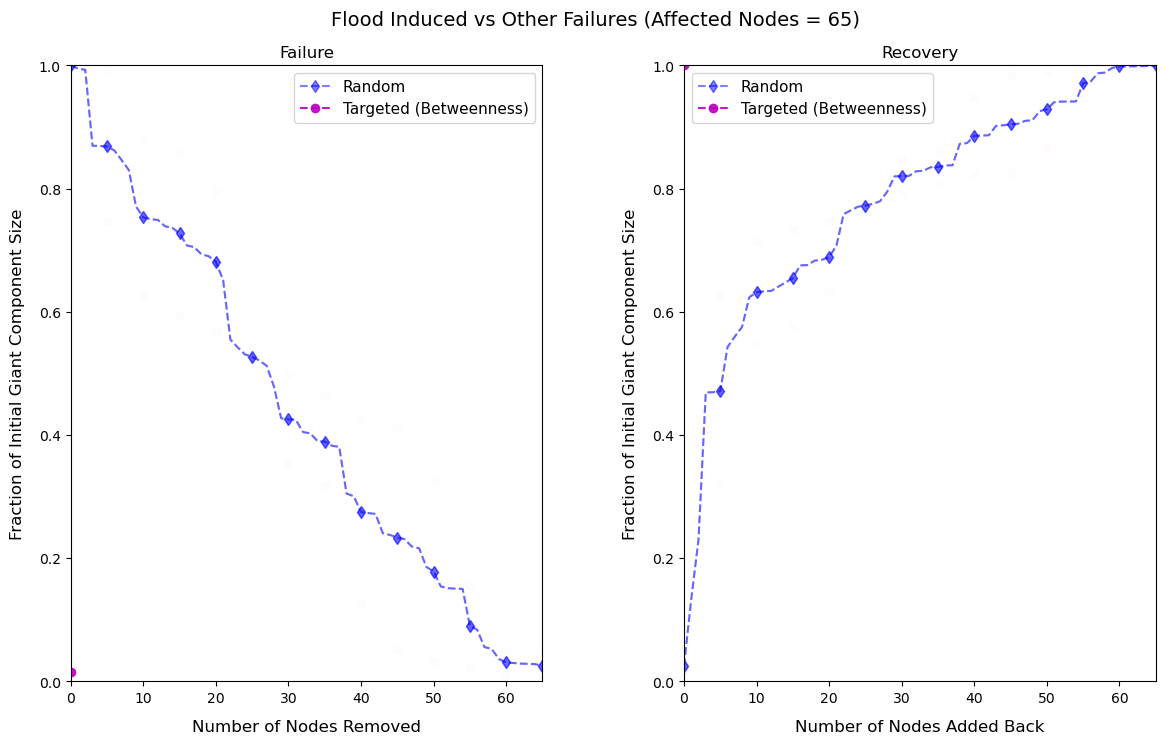

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to ensure the variable is a list or array
def ensure_list(var):
    return var if isinstance(var, (list, np.ndarray)) else [var]

# Debug function to print types and lengths
def debug_print(var_name, var):
    print(f"{var_name}: Type = {type(var)}, Length = {len(var) if isinstance(var, (list, np.ndarray)) else 'N/A'}")

# Adjust node_frac length according to the longest series in the dataset
max_len = max(len(gc_list_by_random_mean), len(gc_list_by_betweenness_mean), len(gc_list_by_degree_mean))

node_frac = np.arange(max_len)
plt.figure(figsize=(14, 8))

# Debug prints
debug_print("gc_list_by_random", gc_list_by_random)
debug_print("gc_list_by_betweenness", gc_list_by_betweenness)
debug_print("gc_list_by_random_mean", gc_list_by_random_mean)
debug_print("gc_list_by_betweenness_mean", gc_list_by_betweenness_mean)

# Plot failure scenarios
for i in range(n_iter):
    plt.subplot(1, 2, 1)
    if len(gc_list_by_random) > i and isinstance(gc_list_by_random[i], (list, np.ndarray)):
        plt.plot(node_frac[:len(gc_list_by_random[i])], gc_list_by_random[i], 'X', alpha=0.010, markevery=5)
    if len(gc_list_by_random_mean) > 0 and isinstance(gc_list_by_random_mean, (list, np.ndarray)):
        plt.plot(node_frac[:len(gc_list_by_random_mean)], gc_list_by_random_mean, 'b--d', alpha=0.1, markevery=5)
    
    if len(gc_list_by_betweenness) > i and isinstance(gc_list_by_betweenness[i], (list, np.ndarray)):
        plt.plot(node_frac[:len(gc_list_by_betweenness[i])], gc_list_by_betweenness[i], 'm--o', markevery=5, alpha=0.01)

if len(gc_list_by_random_mean) > 0 and isinstance(gc_list_by_random_mean, (list, np.ndarray)):
    plt.plot(node_frac[:len(gc_list_by_random_mean)], gc_list_by_random_mean, 'b--d', label='Random', markevery=5, alpha=0.5)
if len(gc_list_by_betweenness_mean) > 0 and isinstance(gc_list_by_betweenness_mean, (list, np.ndarray)):
    plt.plot(node_frac[:len(gc_list_by_betweenness_mean)], gc_list_by_betweenness_mean, 'm--o', label='Targeted (Betweenness)', markevery=5, alpha=0.9)

plt.ylim(top=1, bottom=0)
plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Failure')
plt.margins(x=0, y=0)
plt.legend(fontsize=11)

# Plot recovery scenarios
for i in range(n_iter):
    plt.subplot(1, 2, 2)
    if len(re_gc_list_by_random) > i and isinstance(re_gc_list_by_random[i], (list, np.ndarray)):
        plt.plot(node_frac[:len(re_gc_list_by_random[i])], re_gc_list_by_random[i], 'X', alpha=0.010, markevery=5)
    if len(re_gc_list_by_random_mean) > 0 and isinstance(re_gc_list_by_random_mean, (list, np.ndarray)):
        plt.plot(node_frac[:len(re_gc_list_by_random_mean)], re_gc_list_by_random_mean, 'b--d', alpha=0.1, markevery=5)
    
    if len(re_gc_list_by_betweenness) > i and isinstance(re_gc_list_by_betweenness[i], (list, np.ndarray)):
        plt.plot(node_frac[:len(re_gc_list_by_betweenness[i])], re_gc_list_by_betweenness[i], 'm--o', markevery=5, alpha=0.01)

if len(re_gc_list_by_random_mean) > 0 and isinstance(re_gc_list_by_random_mean, (list, np.ndarray)):
    plt.plot(node_frac[:len(re_gc_list_by_random_mean)], re_gc_list_by_random_mean, 'b--d', label='Random', markevery=5, alpha=0.5)
if len(re_gc_list_by_betweenness_mean) > 0 and isinstance(re_gc_list_by_betweenness_mean, (list, np.ndarray)):
    plt.plot(node_frac[:len(re_gc_list_by_betweenness_mean)], re_gc_list_by_betweenness_mean, 'm--o', label='Targeted (Betweenness)', markevery=5, alpha=0.9)

plt.ylim(top=1, bottom=0)
plt.xlabel('Number of Nodes Added Back', fontsize=12, labelpad=10)
plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Recovery')
plt.margins(x=0, y=0)
plt.legend(fontsize=11)

plt.subplots_adjust(wspace=0.3)
plt.suptitle('Flood Induced vs Other Failures (Affected Nodes = 65)', y=0.95, fontsize='14')
plt.show()
